### **Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights**

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
%matplotlib inline

In [11]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv") 
#"C:\Users\merkm\Dropbox\!IronHack\Week 5\Labs Week 5\5.1-lab-eda-univariate\amz_uk_price_prediction_dataset.csv"

In [8]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


#### **Part 1: Understanding Product Categories**

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

**1.1 Frequency Tables**:
Generate a frequency table for the product category.
Which are the top 5 most listed product categories?

**1.2 Visualizations**:
Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


In [12]:
# 1.1 Frequency Tables: Generate a frequency table for the product category. Which are the top 5 most listed product categories?
frequency_table = df['category'].value_counts()
frequency_table
# Answer: top 5 most listed prodcut categories are 
# Sports & Outdoors                         836265
# Beauty                                     19312
# Handmade Clothing, Shoes & Accessories     19229
# Bath & Body                                19092
# Birthday Gifts                             18978

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

C:\Users\merkm\AppData\Local\Temp\ipykernel_26196\2955668103.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3");


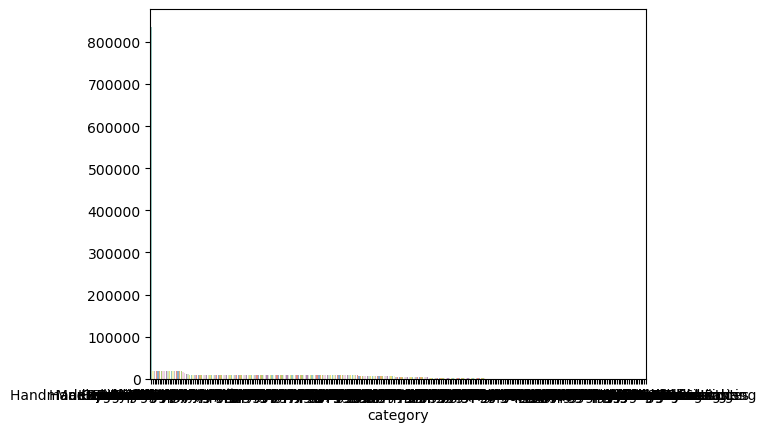

In [24]:
# 1.2 Visualizations: Display the distribution of products across different categories using a bar chart. (If you face problems understanding the chart, do it for a subset of top categories.)
sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3");
plt.show()
#looks shit with all 296 categories - use head within next graph 

C:\Users\merkm\AppData\Local\Temp\ipykernel_26196\525810627.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table.head().index, y=frequency_table.head().values, palette="Set3");


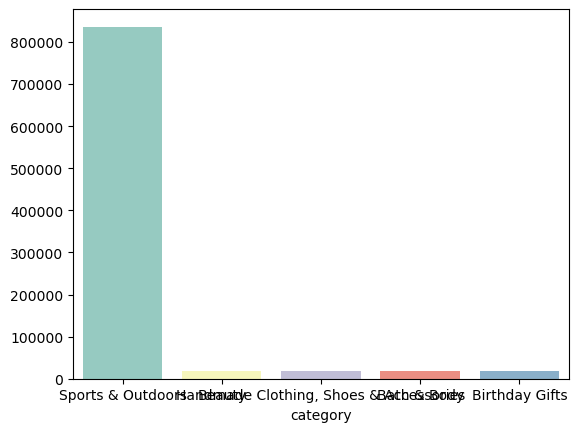

In [28]:
sns.barplot(x=frequency_table.head().index, y=frequency_table.head().values, palette="Set3");
plt.show()

C:\Users\merkm\AppData\Local\Temp\ipykernel_26196\4251354999.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table.head().index, y=frequency_table.head().values, palette="Set3")


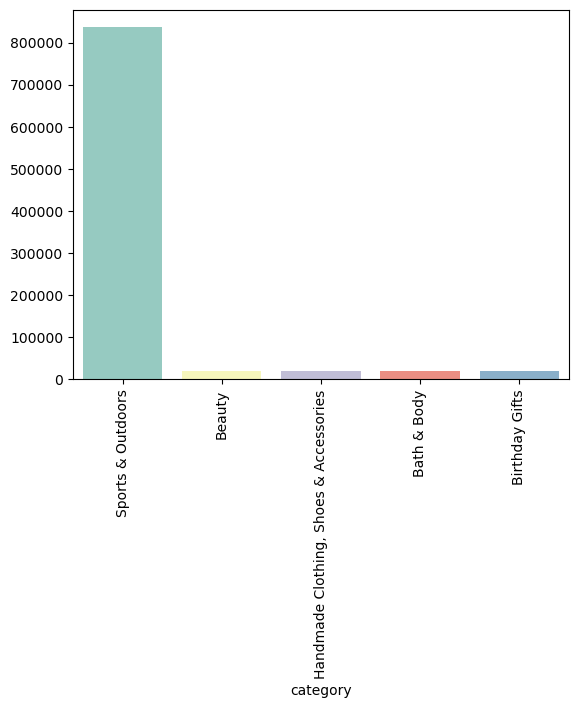

In [35]:
sns.barplot(x=frequency_table.head().index, y=frequency_table.head().values, palette="Set3")
plt.xticks(rotation=90)
plt.show()

#### **Part 2: Delving into Product Pricing**

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

**2.1 Measures of Centrality**:
Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?

**2.2 Measures of Dispersion**:
Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?

**2.3 Visualizations**:
Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. (If its hard to read these diagrams, think why this is, and explain how it could be solved.)
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.


In [43]:
# 2.1 Measures of Centrality: Calculate the mean, median, and mode for the price of products. 
# What's the average price point of products listed? How does this compare with the most common price point (mode)?

mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0] 

mean_price, median_price, mode_price
# (89.24380943923663, 19.09, 9.99)

(89.24380943923663,
 19.09,
 0    9.99
 Name: price, dtype: float64)

In [45]:
# 2.2 Measures of Dispersion: Determine the variance, standard deviation, range, and interquartile range for product price.
# How varied are the product prices? Are there any indicators of a significant spread in prices?

variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price
# 119445.48532256528,
# 345.60886175352226,
# 0.0,
# 100000.0,
# 100000.0,
# 0.25     9.99
# 0.50    19.09
# 0.75    45.99

(119445.48532256528,
 345.60886175352226,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

#### **Part 3: Unpacking Product Ratings**

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

**3.1 Measures of Centrality**:
        Calculate the mean, median, and mode for the rating of products.
        How do customers generally rate products? Is there a common trend?

**3.2 Measures of Dispersion**:
        Determine the variance, standard deviation, and interquartile range for product rating.
        Are the ratings consistent, or is there a wide variation in customer feedback?

**3.3 Shape of the Distribution**:
        Calculate the skewness and kurtosis for the rating column.
        Are the ratings normally distributed, or do they lean towards higher or lower values?

**3.4 Visualizations**:
        Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


In [47]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [71]:
# 3.1 Measures of Centrality: Calculate the mean, median, and mode for the rating of products. 
# How do customers generally rate products? Is there a common trend?
# !!! ITS STARS NOT REVIEWS
mean_reviews = df['reviews'].mean()
median_reviews = df['reviews'].median()
mode_reviews= df['reviews'].mode()[0] 

mean_reviews, median_reviews, mode_reviews
# (2.152836472966065, 0.0, 0.0)

(2.152836472966065, 0.0, 0.0)

In [ ]:
# Zero as value for median/ mode does not mean zero stars, but instead that the most common is that producst DO NOT HAVE A RATING at all = common trend is products with 0 reviews

In [59]:
# 3.2 Measures of Dispersion: Determine the variance, standard deviation, and interquartile range for product rating.
# Are the ratings consistent, or is there a wide variation in customer feedback?

variance_reviews = df['reviews'].var()
std_dev_reviews = df['reviews'].std()
quantiles_reviews = df['reviews'].quantile([0.25, 0.5, 0.75])

variance_reviews, std_dev_reviews, quantiles_reviews 

# Answer: Rather wide variation in customer feedback.

(35332611.92181505,
 5944.124150942261,
 0.25     0.0
 0.50     0.0
 0.75    59.0
 Name: reviews, dtype: float64)

In [61]:
# 3.3 Shape of the Distribution: Calculate the skewness and kurtosis for the rating column. 
# Are the ratings normally distributed, or do they lean towards higher or lower values?

skewness_reviews = df['reviews'].skew()
kurtosis_reviews = df['reviews'].kurtosis()

skewness_reviews, kurtosis_reviews

# Answer: Evidentally not normally distributed values (102.81782179557166, 17741.01460473757)

(102.81782179557166, 17741.01460473757)

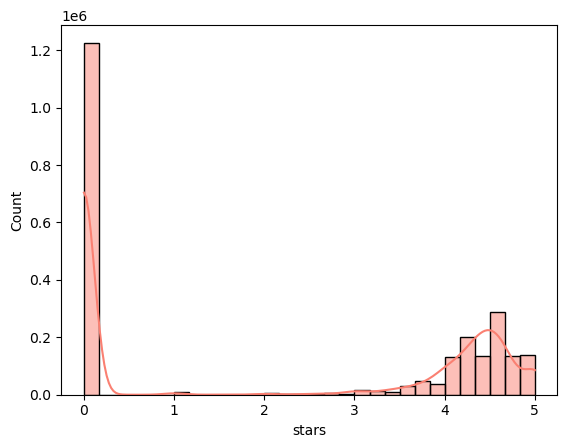

In [69]:
# 3.4 Visualizations**: Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?
sns.histplot(df['stars'], kde=True, bins=30, color="salmon")
plt.show()
# Answer: yes, 0 most common rating 

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings.